In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn.model_selection, sklearn.linear_model, sklearn.svm, sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#CSV data to data frame
headder = ['Sample code number','Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', \
                 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli', \
                 'Mitoses', 'Class']
df = pd.read_csv('./breast-cancer-wisconsin.csv', header=None, names=headder)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#data cleaning
print(df.describe())
print(df.dtypes)
print(df.isnull().sum().sum())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.990000e+02       699.000000               699.000000   
mean         1.071704e+06         4.417740                 3.134478   
std          6.170957e+05         2.815741                 3.051459   
min          6.163400e+04         1.000000                 1.000000   
25%          8.706885e+05         2.000000                 1.000000   
50%          1.171710e+06         4.000000                 1.000000   
75%          1.238298e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

In [5]:
_dict=df["Class"].value_counts().to_dict()
print(_dict)

{2: 458, 4: 241}


# Observation 1:- Classes are not equally distributed

<AxesSubplot:>

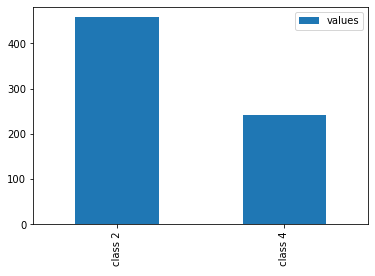

In [6]:
plotdata = pd.DataFrame(
    {"values": [458, 241]}, 
    index=["class 2"," class 4"])
# Plot a bar chart
plotdata.plot(kind="bar")

# Data cleaning 

In [7]:
# as the Bare Nuclei is the only column that is an object it should be inspected in detail
print(df['Bare Nuclei'].unique())
df['Bare Nuclei']=df['Bare Nuclei'].replace('?', np.NaN)
df['Bare Nuclei']=pd.to_numeric(df['Bare Nuclei'])

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [8]:
#From the obove observations it can concluded that there are 
#few values in Bare Nucei column that has be replaced by a mathematical operation
#one of the way to do it is by replacing with mean value
# To avoide data leackage data is divided into train and test part
#machine learning
from sklearn.model_selection import train_test_split
X = df.drop(['Sample code number','Class'],axis=1)
Y = df[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train['Bare Nuclei'].fillna(value=X_train['Bare Nuclei'].mean(), inplace=True)
print(X_train['Bare Nuclei'].unique())

[ 1.          3.         10.          9.          7.          3.66666667
  2.          8.          5.          4.          6.        ]


In [9]:
complete_training_data= pd.concat([X_train, y_train],axis=1)

In [10]:
complete_training_data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [11]:
complete_training_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
137,3,1,1,1,2,1.0,1,1,1,2
485,1,1,1,3,1,3.0,1,1,1,2
483,8,7,8,5,5,10.0,9,10,1,4
33,2,1,1,2,2,1.0,3,1,1,2
662,1,1,3,1,2,1.0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2.0,7,8,10,4
106,10,10,10,8,2,10.0,4,1,1,4
270,8,4,7,1,3,10.0,3,9,2,4
435,10,8,10,1,3,10.0,5,1,1,4


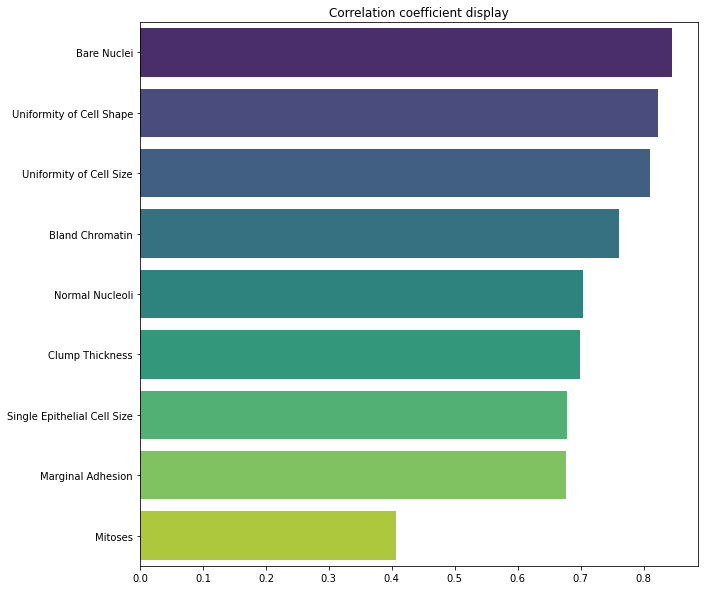

In [12]:
plt.figure(figsize=(10,10))
data = complete_training_data.corr()["Class"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='viridis')
plt.title('Correlation coefficient display')
plt.show()

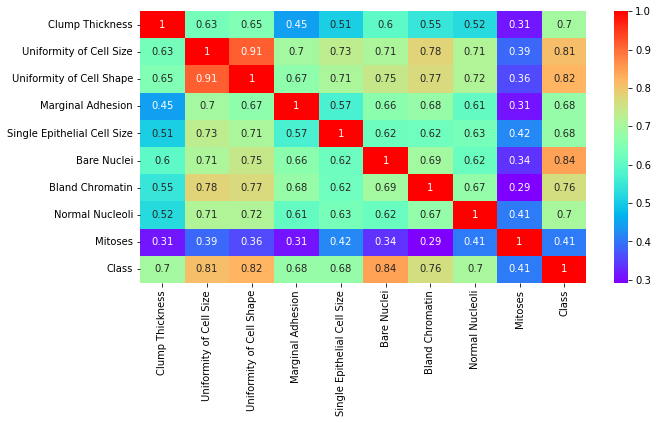

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(complete_training_data.corr(), annot = True, cmap="rainbow")
plt.show()

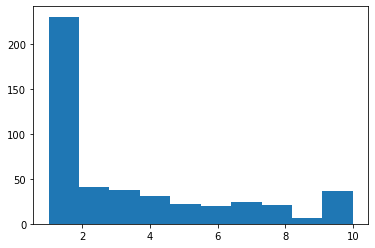

In [14]:
# the top 3 corellated features are Bare Nuclei,Uniformity of Cell Size,Uniformity of Cell Shape
plt.hist(complete_training_data['Uniformity of Cell Shape'])
plt.show()

In [15]:
#Uniformity of Cell Shape are skewed where most of the values belong to category 1

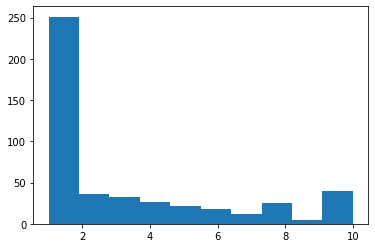

In [16]:
plt.hist(complete_training_data['Uniformity of Cell Size'])
plt.show()

In [17]:
#Uniformity of Cell Size are skewed where most of the values belong to category 1

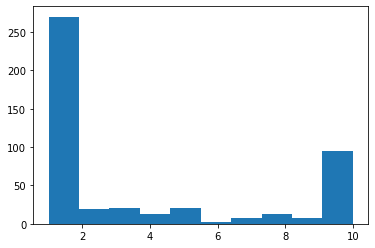

In [18]:
plt.hist(complete_training_data['Bare Nuclei'])
plt.show()

In [19]:
#UBare Nuclei are skewed where most of the values belong to category 1 and category 10

In [20]:
from plotnine.data import mpg
from plotnine import ggplot
from plotnine import *

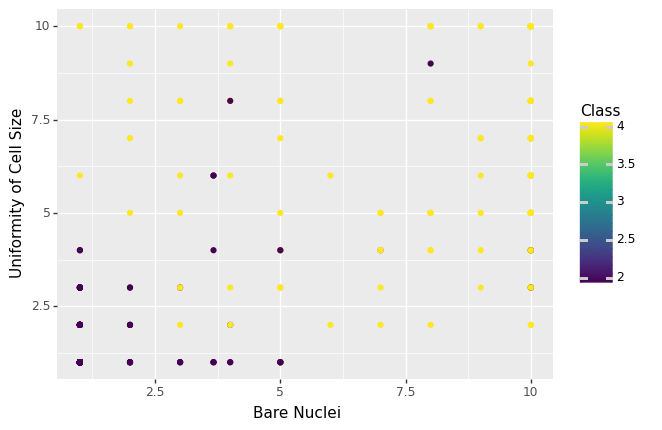

<ggplot: (8765132778403)>

In [21]:
ggplot(complete_training_data, aes(x = 'Bare Nuclei', y = 'Uniformity of Cell Size',color = 'Class')) + geom_point()

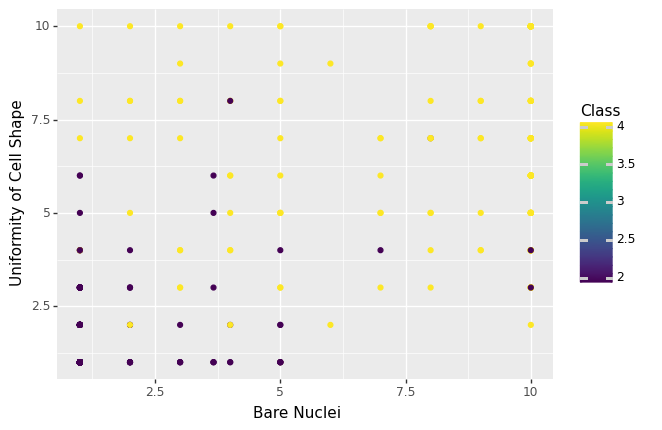

<ggplot: (8765102121768)>

In [22]:
ggplot(complete_training_data, aes(x = 'Bare Nuclei', y = 'Uniformity of Cell Shape',color = 'Class')) + geom_point()

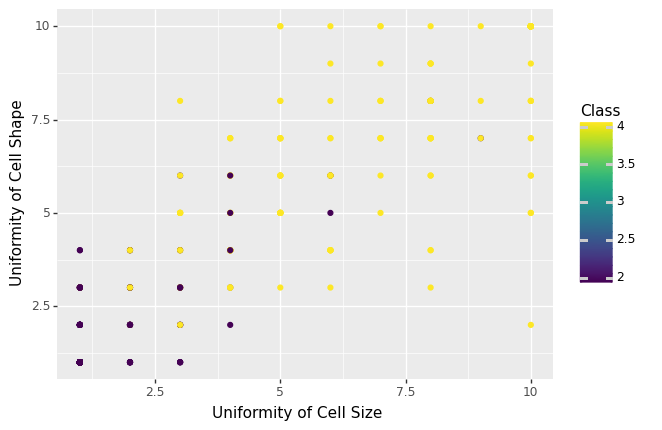

<ggplot: (8765102210217)>

In [23]:
ggplot(complete_training_data, aes(x = 'Uniformity of Cell Size', y = 'Uniformity of Cell Shape',color = 'Class')) + geom_point()

In [24]:
#altering x_test
X_test['Bare Nuclei'].fillna(value=X_test['Bare Nuclei'].mean(), inplace=True)
print(X_test['Bare Nuclei'].unique())

[ 3.28959276  1.         10.          4.          3.          5.
  6.          8.          9.          2.          7.        ]


In [25]:
#BayesSearchCV is considered better than Randomsearch and gridsearch conter parts methedologies.

In [29]:
#machine learning models
#Model 1 Logistic regression
model = LogisticRegression()
params={
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2']
}

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
grid_search = BayesSearchCV(model, params, n_jobs=-1, cv=cv, scoring='accuracy')

By_search = BayesSearchCV(model, params, n_jobs=-1, cv=cv, scoring='accuracy')
lr_By_result = By_search.fit(X_train,y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (lr_By_result.best_score_, lr_By_result.best_params_))
means = lr_By_result.cv_results_['mean_test_score']
stds = lr_By_result.cv_results_['std_test_score']
params = lr_By_result.cv_results_['params']

Best: 0.960470 using OrderedDict([('penalty', 'l2'), ('solver', 'newton-cg')])


F1 score for LogisticRegression model is 0.9560719033581874


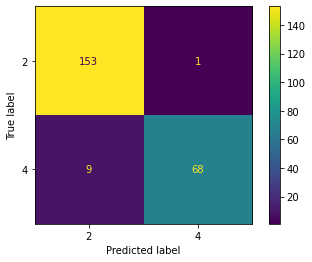

specificity for LogisticRegression 0.9935064935064936
              precision    recall  f1-score   support

           2       0.94      0.99      0.97       154
           4       0.99      0.88      0.93        77

    accuracy                           0.96       231
   macro avg       0.96      0.94      0.95       231
weighted avg       0.96      0.96      0.96       231



In [30]:
#best model params are
model=LogisticRegression(**lr_By_result.best_params_)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("F1 score for LogisticRegression model is",f1_score(y_test, y_pred,average='weighted'))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity for LogisticRegression",specificity)
print(classification_report(y_test, y_pred))

In [31]:
#model 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
model = RandomForestClassifier()

# define BayesSearch
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
By_search = BayesSearchCV(model, params, n_jobs=-1, cv=cv, scoring='accuracy')
rf_By_result = By_search.fit(X_train,y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (rf_By_result.best_score_, rf_By_result.best_params_))
means = rf_By_result.cv_results_['mean_test_score']
stds = rf_By_result.cv_results_['std_test_score']
params = rf_By_result.cv_results_['params']

Best: 0.967949 using OrderedDict([('bootstrap', True), ('max_depth', 80), ('max_features', 2), ('min_samples_leaf', 3), ('min_samples_split', 12), ('n_estimators', 300)])


F1 score for RandomForestClassifier model is 0.974025974025974


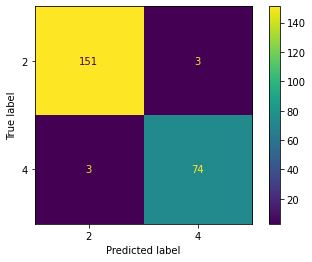

specificity for RandomForestClassifier 0.9805194805194806
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       154
           4       0.96      0.96      0.96        77

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



In [32]:
#best model params are
model=RandomForestClassifier(**rf_By_result.best_params_)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("F1 score for RandomForestClassifier model is",f1_score(y_test, y_pred,average='weighted'))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity for RandomForestClassifier",specificity)
print(classification_report(y_test, y_pred))

In [33]:
#decesion tree
model=DecisionTreeClassifier()
tree_param = {'criterion':['gini','entropy'],'max_depth':np.arange(3, 50)}
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
By_search = BayesSearchCV(model, tree_param, n_jobs=-1, cv=cv, scoring='accuracy')
dt_By_result = By_search.fit(X_train,y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (dt_By_result.best_score_, dt_By_result.best_params_))
means = dt_By_result.cv_results_['mean_test_score']
stds = dt_By_result.cv_results_['std_test_score']
params = dt_By_result.cv_results_['params']


Best: 0.949786 using OrderedDict([('criterion', 'entropy'), ('max_depth', 4)])


F1 score for DecisionTreeClassifier model is 0.921816638370119


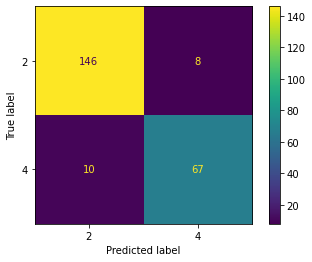

specificity for DecisionTreeClassifier 0.948051948051948
              precision    recall  f1-score   support

           2       0.94      0.95      0.94       154
           4       0.89      0.87      0.88        77

    accuracy                           0.92       231
   macro avg       0.91      0.91      0.91       231
weighted avg       0.92      0.92      0.92       231



In [34]:
model=DecisionTreeClassifier(**dt_By_result.best_params_)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("F1 score for DecisionTreeClassifier model is",f1_score(y_test, y_pred,average='weighted'))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity for DecisionTreeClassifier",specificity)
print(classification_report(y_test, y_pred))

In [36]:
#svc
params = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
model=SVC()
tree_param = {'criterion':['gini','entropy'],'max_depth':np.arange(3, 50)}
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
By_search = BayesSearchCV(model, params, n_jobs=-1, cv=cv, scoring='accuracy')
svc_By_result = By_search.fit(X_train,y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (svc_By_result.best_score_, svc_By_result.best_params_))
means = svc_By_result.cv_results_['mean_test_score']
stds = svc_By_result.cv_results_['std_test_score']
params = svc_By_result.cv_results_['params']



Best: 0.970085 using OrderedDict([('C', 1.0), ('degree', 5), ('gamma', 0.01), ('kernel', 'rbf')])


F1 score for SVC model is 0.969646974215792


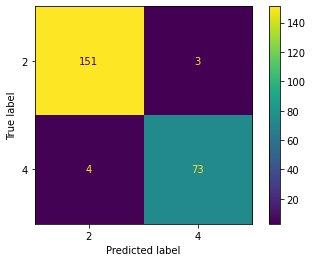

specificity for SVC 0.9805194805194806
              precision    recall  f1-score   support

           2       0.97      0.98      0.98       154
           4       0.96      0.95      0.95        77

    accuracy                           0.97       231
   macro avg       0.97      0.96      0.97       231
weighted avg       0.97      0.97      0.97       231



In [37]:
model=SVC(**svc_By_result.best_params_)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("F1 score for SVC model is",f1_score(y_test, y_pred,average='weighted'))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity for SVC",specificity)
print(classification_report(y_test, y_pred))

In [38]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
estimators = [
('dt',DecisionTreeClassifier(**dt_By_result.best_params_)),
('rf', RandomForestClassifier(**rf_By_result.best_params_)),
("svc",SVC(**svc_By_result.best_params_)),
("lr", LogisticRegression(**lr_By_result.best_params_))
]
clf = StackingClassifier(
estimators=estimators)

F1 score for stacking model is 0.9739388794567062


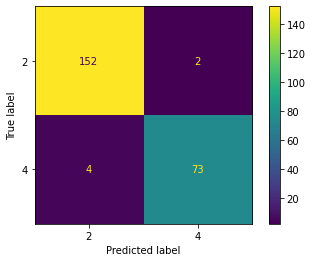

specificity for stacking 0.987012987012987
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       154
           4       0.97      0.95      0.96        77

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



In [39]:
clf.fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)
print("F1 score for stacking model is",f1_score(y_test, y_pred,average='weighted'))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print("specificity for stacking",specificity)
print(classification_report(y_test, y_pred))

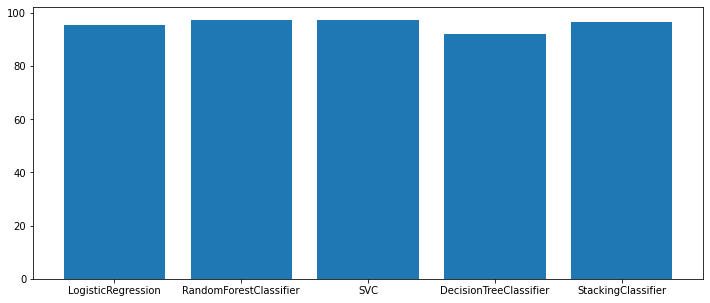

In [40]:
#F1 score is usually more useful than accuracy, in case uneven class distribution. 
#Accuracy works best if false positives and false negatives have similar cost
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 5))
models = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier', 'StackingClassifier']
f1_score = [95.60719033581874,97.4025974025974,97.39388794567062,92.1816638370119,96.51282051282051]
plt.bar(models,f1_score)
plt.show()

In [ ]:
#Best models are Random Forest and SVC with f1-scores 
#is above 97% and accuracy in range of 96%